# Machine Learning

In [578]:
# 3rd Party Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, GroupKFold
from sklearn.model_selection import train_test_split

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [579]:
# Import Combined Data
data = pd.read_csv("../2_data_cleaning/cleaned_csv/combined_data.csv")
data = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']), crs="EPSG:4326")
data.head()

,Unnamed: 0,price,address,mls,sqft,Community,beds,baths,Building Type,Air Conditioning,...,AUTOTHEFT_NORM,BIKETHEFT_NORM,BREAKENTER_NORM,HOMICIDE_NORM,ROBBERY_NORM,SHOOTING_NORM,THEFT_MV_NORM,THEFT_OV_NORM,CRIME_PCA1,CRIME_PCA2
0,0,888000.0,1515 - 8 HILLCREST AVENUEToronto (Willowdale E...,C10650046,1099.5,Willowdale East,3.0,2.0,Apartment,Central air conditioning,...,0.002626,0.001922,0.001709,0.000011,0.001930,0.000000,0.006353,0.001086,-1.897073,0.895009
1,1,639000.0,1502 - 10 YORK STREETToronto (Waterfront Commu...,C10640404,549.5,Waterfront Communities C1,1.0,1.0,Apartment,Central air conditioning,...,0.001353,0.007390,0.004434,0.000020,0.001343,0.000197,0.004971,0.001118,-1.528335,1.056112
2,2,399900.0,"708 - 60 TOWN CENTRE COURTToronto (Bendale), O...",E10541395,649.5,Bendale,2.0,1.0,Apartment,Central air conditioning,...,0.008089,0.001025,0.004644,0.000087,0.006977,0.000491,0.008583,0.001507,-0.011734,-0.491790
3,3,855000.0,"506 - 12 REAN DRIVEToronto (Bayview Village), ...",C10511289,1299.5,Bayview Village,2.0,2.0,Apartment,Central air conditioning,...,0.003503,0.001654,0.004093,0.000020,0.000920,0.000139,0.005612,0.000952,-1.863530,0.635934
4,4,2749000.0,"12 EUCLID AVENUEToronto (Highland Creek), Onta...",E10477077,4250.0,Highland Creek,4.0,6.5,Detached,Central air conditioning,...,0.007706,0.001586,0.007352,0.000092,0.003262,0.000244,0.010117,0.000646,-0.661818,-0.115449


In [580]:
# Explore Columns in Data
data.columns

Index(['Unnamed: 0', 'price', 'address', 'mls', 'sqft', 'Community', 'beds',
       'baths', 'Building Type', 'Air Conditioning', 'Heating Type',
       'No amenity', 'Party/Meeting Room', 'Gym', 'Rooftop Deck/Garden',
       'Balcony', 'Pool', 'Exercise Room', 'Sauna', 'Guest Suites',
       'Party Room', 'Storage - Locker', 'Exercise Centre', 'Bbqs Allowed',
       'Security/Concierge', 'Concierge', 'Visitor Parking', 'Recreation Room',
       'geometry', 'ROUTE_NAME', 'RID', 'distance_to_subway', 'School Name',
       'EQAO % at Levels 3/4', 'OSSLT % Successful', 'Fraiser Score',
       'distance_to_school', 'total_area_within_800m', 'Neighbourhood',
       'ASSAULT_NORM', 'AUTOTHEFT_NORM', 'BIKETHEFT_NORM', 'BREAKENTER_NORM',
       'HOMICIDE_NORM', 'ROBBERY_NORM', 'SHOOTING_NORM', 'THEFT_MV_NORM',
       'THEFT_OV_NORM', 'CRIME_PCA1', 'CRIME_PCA2'],
      dtype='object')

In [581]:
# Drop Unnecessary Columns
data = data[['price', 'sqft', 'Community', 'beds', 'baths', 'Building Type', 'distance_to_subway','EQAO % at Levels 3/4', 'OSSLT % Successful', 'Fraiser Score', 'distance_to_school', 'total_area_within_800m', 'CRIME_PCA1', 'CRIME_PCA2']]
data.head()

,price,sqft,Community,beds,baths,Building Type,distance_to_subway,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,distance_to_school,total_area_within_800m,CRIME_PCA1,CRIME_PCA2
0,888000.0,1099.5,Willowdale East,3.0,2.0,Apartment,69.549883,68.0,92.0,7.9,730.309818,0.067556,-1.897073,0.895009
1,639000.0,549.5,Waterfront Communities C1,1.0,1.0,Apartment,684.265472,36.0,81.0,5.1,4007.190133,0.016200,-1.528335,1.056112
2,399900.0,649.5,Bendale,2.0,1.0,Apartment,208.924251,59.0,82.0,6.9,3299.426757,0.026428,-0.011734,-0.491790
3,855000.0,1299.5,Bayview Village,2.0,2.0,Apartment,167.485449,71.0,92.0,8.3,2605.785570,0.103265,-1.863530,0.635934
4,2749000.0,4250.0,Highland Creek,4.0,6.5,Detached,9442.629702,27.0,77.0,4.7,3555.528957,0.162422,-0.661818,-0.115449


In [582]:
# Explore Building Type Column
data['Building Type'] = data['Building Type'].str.lower()
data["Building Type"].value_counts()

Building Type
detached              1807
condo apt              969
apartment              566
semi-detached          198
condo townhouse        111
row / townhouse         80
freehold townhouse      53
condo/apt unit           6
co-op apt                6
link                     5
duplex                   4
triplex                  4
co-ownership apt         3
att/row/twnhouse         1
multiplex                1
Name: count, dtype: int64

In [583]:
# Focus Only on Detached Homes
house_types = ["detached", "semi-detached", "condo townhouse", "row / townhouse", "freehold townhouse"]
data = data[data["Building Type"].isin(house_types)]
data.head()

,price,sqft,Community,beds,baths,Building Type,distance_to_subway,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,distance_to_school,total_area_within_800m,CRIME_PCA1,CRIME_PCA2
4,2749000.0,4250.0,Highland Creek,4.0,6.5,detached,9442.629702,27.0,77.0,4.7,3555.528957,0.162422,-0.661818,-0.115449
5,2249000.0,1750.0,The Beaches,4.0,5.5,detached,3205.241838,74.0,98.0,8.6,2535.476162,0.028666,-1.447146,1.052511
14,2249000.0,2150.0,NaN,4.0,5.5,detached,3205.241838,74.0,98.0,8.6,2535.476162,0.013955,-1.447146,1.052511
27,799900.0,1299.5,Bayview Village,3.0,3.5,row / townhouse,2818.241531,37.0,81.0,5.6,2111.243682,0.027961,-1.863530,0.635934
31,999900.0,1099.5,Newtonbrook East,3.0,3.5,row / townhouse,682.280431,43.0,62.0,3.4,1804.508914,0.605603,-0.697107,0.237471


In [584]:
# Drop NA Values
data = data.dropna()

data = data[data['price'] > 0]
data = data[data['sqft'] > 0]

data = data.drop('Building Type', axis=1)

In [585]:
# Perform PCA on School Columns
# Select School Columns
columns_for_pca = ['EQAO % at Levels 3/4', 'OSSLT % Successful', 'Fraiser Score']

# Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_for_pca])

# Apply PCA
pca = PCA(n_components=1)  
principal_component = pca.fit_transform(scaled_data)

# Add Principal Component as New Coluimn
data['School_PCA'] = principal_component

# Drop Original Columns
data.drop(columns=columns_for_pca, inplace=True)

In [586]:
# Rename Columns 
data.columns = ["Price", "Area (SqFt)", "Neighbourhood", "Bedrooms", "Bathrooms", "Distance to Subway", "Distance to High School", "Park Area within Walking Distance", "Crime PCA1", "Crime PCA 2", "School PCA"]
data.head()

,Price,Area (SqFt),Neighbourhood,Bedrooms,Bathrooms,Distance to Subway,Distance to High School,Park Area within Walking Distance,Crime PCA1,Crime PCA 2,School PCA
4,2749000.0,4250.0,Highland Creek,4.0,6.5,9442.629702,3555.528957,0.162422,-0.661818,-0.115449,1.607244
5,2249000.0,1750.0,The Beaches,4.0,5.5,3205.241838,2535.476162,0.028666,-1.447146,1.052511,-2.124521
27,799900.0,1299.5,Bayview Village,3.0,3.5,2818.241531,2111.243682,0.027961,-1.863530,0.635934,0.817631
31,999900.0,1099.5,Newtonbrook East,3.0,3.5,682.280431,1804.508914,0.605603,-0.697107,0.237471,2.396759
33,900000.0,1300.0,Morningside,3.0,2.0,5372.550461,2164.866959,0.049581,-1.204343,-0.308639,1.607244


In [587]:
data = data[data['Area (SqFt)'] <= 6000]

In [588]:
neighbourhood_counts = data['Neighbourhood'].value_counts()
valid_neighborhoods = neighbourhood_counts[neighbourhood_counts > 20].index
data = data[data['Neighbourhood'].isin(valid_neighborhoods)]
data["Neighbourhood"].value_counts()

Neighbourhood
St. Andrew-Windfields                  70
Willowdale East                        57
Banbury-Don Mills                      40
Stonegate-Queensway                    39
Birchcliffe-Cliffside                  39
Forest Hill South                      37
Bedford Park-Nortown                   36
Islington-City Centre West             36
Bayview Village                        36
Bridle Path-Sunnybrook-York Mills      33
Dovercourt-Wallace Emerson-Junction    32
Oakwood Village                        32
Cliffcrest                             32
Lawrence Park South                    32
Clairlea-Birchmount                    30
Woburn                                 30
Rosedale-Moore Park                    30
Newtonbrook East                       29
Princess-Rosethorn                     28
Wexford-Maryvale                       28
Willowdale West                        28
Malvern                                27
Willowridge-Martingrove-Richview       26
Alderwood           

In [589]:
# Features (X) and target (y)
X = data.drop(['Price', 'Neighbourhood'], axis=1)
y = data['Price']

# Ensure 'neighborhood_column' exists
neighborhoods = data['Neighbourhood']

# Split data into training and test sets
X_train, X_test, y_train, y_test, neighborhoods_train, neighborhoods_test = train_test_split(
    X, y, neighborhoods, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Set up GroupKFold for splitting by neighborhoods
group_kfold = GroupKFold(n_splits=5)

# Perform grid search with cross-validation by neighborhood
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=group_kfold.split(X_train, y_train, groups=neighborhoods_train),
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate R² score on the test set
r2 = r2_score(y_test, y_pred)
print(f'R² Score on Test Set: {r2}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
R² Score on Test Set: 0.8021247932417522



Top 10 Important Features:
                             Feature  Importance
2                          Bathrooms    0.320947
0                        Area (SqFt)    0.272170
6                         Crime PCA1    0.100018
1                           Bedrooms    0.092866
8                         School PCA    0.060453
7                        Crime PCA 2    0.056405
3                 Distance to Subway    0.047228
4            Distance to High School    0.040120
5  Park Area within Walking Distance    0.009793


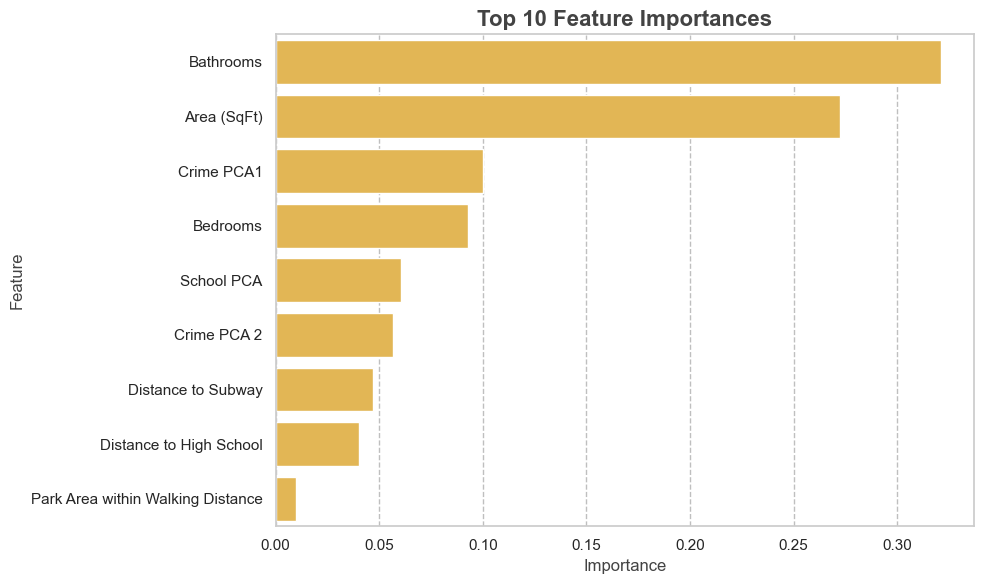

In [590]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importances
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Define a single yellow color for all bars
yellow_color = '#f9bf3e'

# Set a white background
sns.set_theme(style="whitegrid")

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(10), 
    color=yellow_color  # Single color for all bars
)
plt.title('Top 10 Feature Importances', fontsize=16, fontweight='bold', color='#434343')
plt.xlabel('Importance', fontsize=12, color='#434343')
plt.ylabel('Feature', fontsize=12, color='#434343')

# Style the plot
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


Mean Squared Error: 1318603295904.0764
Mean Absolute Error: 600396.219233042
R² Score: 0.8021247932417522


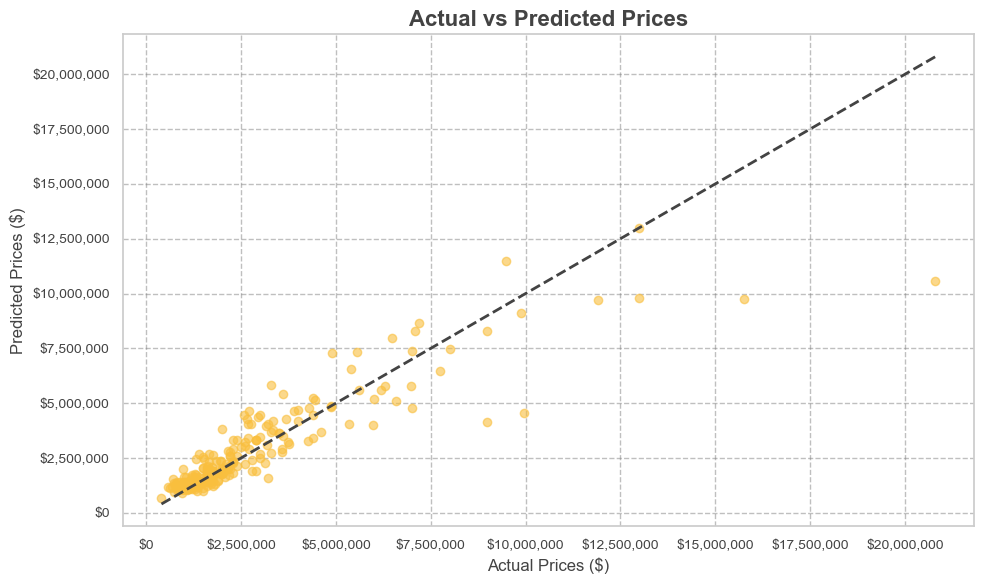

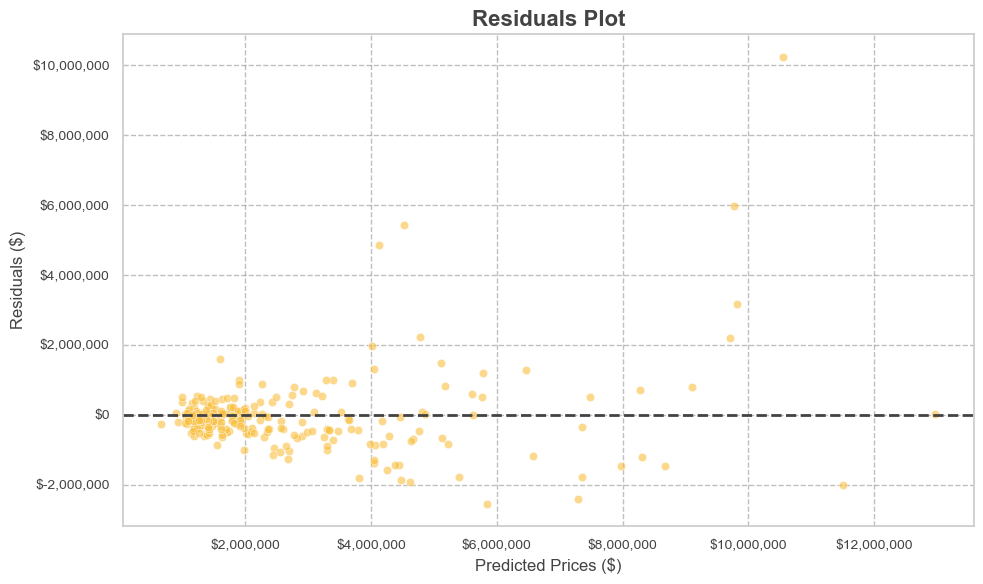

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions from the best Random Forest Regressor model
y_pred_test = best_rf.predict(X_test)

# Calculate the regression metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
residuals = y_test - y_pred_test

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Scatter plot: Predicted vs Actual values
sns.set_theme(style="whitegrid")  # Set white background

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='#f9bf3e')  # Yellow points
plt.plot(
    [min(y_test), max(y_test)], 
    [min(y_test), max(y_test)], 
    color='#434343', linestyle='--', linewidth=2  # Gray diagonal line
)
plt.xlabel('Actual Prices ($)', fontsize=12, color='#434343')
plt.ylabel('Predicted Prices ($)', fontsize=12, color='#434343')
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold', color='#434343')
plt.grid(alpha=0.5, linestyle='--', color='gray')  # Subtle grid

# Format axis ticks with dollar sign
plt.xticks(fontsize=10, color='#434343')
plt.yticks(fontsize=10, color='#434343')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${y:,.0f}'))

plt.tight_layout()
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals, color='#f9bf3e', alpha=0.6)  # Yellow points
plt.axhline(0, color='#434343', linestyle='--', linewidth=2)  # Gray reference line
plt.xlabel('Predicted Prices ($)', fontsize=12, color='#434343')
plt.ylabel('Residuals ($)', fontsize=12, color='#434343')
plt.title('Residuals Plot', fontsize=16, fontweight='bold', color='#434343')
plt.grid(alpha=0.5, linestyle='--', color='gray')  # Subtle grid

# Format axis ticks with dollar sign
plt.xticks(fontsize=10, color='#434343')
plt.yticks(fontsize=10, color='#434343')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${y:,.0f}'))

plt.tight_layout()
plt.show()
